# 2
> GDL

- toc: true 
- badges: true
- comments: false
- categories: [jupyter]


# geometric deep learning models 

## <font color="CornflowerBlue">2.1 ... tensors in pytorch</font>

In [2]:
pip install torch --upgrade

     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:42tcmalloc: large alloc 1147494400 bytes == 0x55e98d60e000 @  0x7f82bf648615 0x55e9534e44cc 0x55e9535c447a 0x55e9534e72ed 0x55e9535d8e1d 0x55e95355ae99 0x55e9535559ee 0x55e9534e8bda 0x55e95355ad00 0x55e9535559ee 0x55e9534e8bda 0x55e953557737 0x55e9535d9c66 0x55e953556daf 0x55e9535d9c66 0x55e953556daf 0x55e9535d9c66 0x55e953556daf 0x55e9534e9039 0x55e95352c409 0x55e9534e7c52 0x55e95355ac25 0x55e9535559ee 0x55e9534e8bda 0x55e953557737 0x55e9535559ee 0x55e9534e8bda 0x55e953556915 0x55e9534e8afa 0x55e953556c0d 0x55e9535559ee
     |████████████████████████████████| 881.9 MB 16 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvi

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.utils.data as data

In [4]:
torch.manual_seed(42)
print("Using torch", torch.__version__)

Using torch 1.9.0+cu111


### <font color="teal">... helper classes and functions </font>

In [5]:
from PIL import Image
from torchvision import transforms

In [6]:
!pip install tabletext

  Created wheel for tabletext: filename=tabletext-0.1-py3-none-any.whl size=6022 sha256=aa9d9579b7a4b73606e8bfcc3de7c5b82bdac6ff7e33c90d90e28fad443d8760
  Stored in directory: /root/.cache/pip/wheels/cc/ae/ab/697f6cd9887c63663da889f796c2c7ea280bc407b16f6fd081
Successfully built tabletext


In [7]:
from tabletext import to_text

___

#### method ... `info`

_can currently handle 1- and 2-tensors_

In [97]:
#collapse-hide

def info(obj, name):

    ty_tens = type( torch.tensor([2]) )

    ty_np = type( np.array([2]) )

    delim = "   "

    if obj.ndim == 1:

        display_obj = obj[None,:]

    elif obj.ndim == 2:

        display_obj = obj
    else:
        display_obj = obj

    if type(obj) == ty_tens:

        print( "tensor", delim, name, "\n" )

        print( delim, "num. dims   ", delim, obj.ndim )

        print( delim, "num. entries", delim, np.array( obj ).size )

        print( delim, "shape       ", delim, np.array( obj.size() ) )

    if type(obj) == ty_np:

        print( "np array", delim, name, "\n" )

        print( delim, "number of dimensions", obj.ndim )

        print( delim, "number of entries", delim, obj.size )

        print( delim, "shape", delim, obj.shape )

    print("\n")

    display_list = display_obj.tolist()

    J = len( display_list )
    K = len( display_list[0])

    outer_list = []

    for j in range(J):

        inner_list = []

        for k in range(K):

            inner_list += [ str( display_list[j][k] )[:4] ]

        outer_list += [ inner_list ]

    print( to_text( outer_list ) )

    print("\n\n")

___

___

#### method ... `viz_tens`

args

* `tens`

* `display_size`

In [9]:
#collapse-hide
def viz_tens( tens, display_size = 2 ):

    size = display_size

    if tens.ndim == 1:

        display_obj = tens[None,:]

        display_obj = display_obj.float()

    elif tens.ndim == 2:

        display_obj = tens

        display_obj = display_obj.float()

    pil_image = transforms.ToPILImage()( display_obj ).convert("RGB")

    fig = plt.figure( figsize = (size, size) )

    f_rows, f_cols = 1, 1

    fig.add_subplot( f_rows, f_cols, 1 )

    plt.tick_params( left = False, bottom = False )

    plt.axis('off')

    plt.imshow(pil_image)

___

___

#### method ... `viz_tens_list`

args

* `list_of_tensors`

* `display_size = 6`

In [126]:
#collapse-hide

def viz_tens_list( list_of_tensors, display_size = 6 ):

    tensor_list = list_of_tensors

    new_tensor_list = None

    if tensor_list[0].ndim == 1:

        new_tensor_list = [ tens[None,:].float() for tens in tensor_list ]

    else:

        new_tensor_list = [ tens.float() for tens in tensor_list ]

    size = display_size

    image_list = [ transforms.ToPILImage()(x).convert("RGB") for x in list_of_tensors ]

    tensor_list = [ transforms.ToTensor()(image) for image in image_list]

    grid = torchvision.utils.make_grid( tensor_list, nrow = 4, padding = 2, pad_value = 1.0 )

    grid_pil = transforms.ToPILImage()(grid).convert("RGB")

    fig = plt.figure( figsize = (size, size) )

    f_rows, f_cols = 1, 1

    fig.add_subplot( f_rows, f_cols, 1 )

    plt.tick_params( left = False, bottom = False )

    plt.axis('off')

    plt.imshow(grid_pil)

___

### <font color="teal">... initializing tensors</font>

Tensors are similar to NumPy's `ndarrays`, except that tensors can run on GPUs or other hardware accelerators. Tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data. Tensors are also optimized for automatic differentiation


Here are some ways they can be initialized in torch.

1. from lists: $\quad$ `X_1 = torch.tensor( list_object )`

2. from a numpy array $\quad$ `X_2 = torch.from_numpy( array_object )`

3. with random or constant values, of a given shape. For example,

    a. entries all ones: $\quad$ `X_3_a = torch.ones( shape )`

    b. entries all zeros $\quad$ `X_3_b = torch.zeros( shape )`

    c. entries are i.i.d. $\text{Unif}(0,1)$ $\quad$ `X_3_c = torch.rand( shape )`

    d. entries are i.i.d. standard normal $\quad$ `X_3_d = torch.randn( shape )`

    e. from values stored in memory $\quad$ `X_3_e = torch.Tensor( shape )`
    
    f. a list of consecutive integers between $N$ and $M$, inclusive, as tensor object $\quad$ `X_3_f = torch.arange(N,M)`

#### ... 1.   from lists

tensor     X1 

    num. dims        1
    num. entries     2
    shape            [2]


┌───┬───┐
│ 2 │ 3 │
└───┴───┘





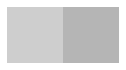

In [11]:
#collapse-hide
X_1 = torch.tensor( [ 2, 3 ] )
info(X_1, "X1")
viz_tens( 25 * X_1 ) # the factor there to help distinguish values

#### ... 2. from numpy

tensor     'X two' 

    num. dims        1
    num. entries     3
    shape            [3]


┌───┬───┬───┐
│ 2 │ 3 │ 4 │
└───┴───┴───┘





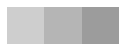

In [12]:
#collapse-hide
X_2 = torch.from_numpy( np.array( [ 2, 3, 4 ] ) )
info(X_2, "'X two'")
viz_tens( 25 * X_2 )

The next examples allow a shape to be provided as an argument. 

In [13]:
#collapse-hide

shape_dict = {}

shape_dict["i"] = ( 3 )

shape_dict["ii"] = ( 2, 3 )

shape_dict["iii"] = ( 2, 3, )

#### ... 3. (a) ones of given shape

tensor     'X three (a) i' 

    num. dims        1
    num. entries     3
    shape            [3]


┌─────┬─────┬─────┐
│ 1.0 │ 1.0 │ 1.0 │
└─────┴─────┴─────┘



tensor     'X three (a) ii' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌─────┬─────┬─────┐
│ 1.0 │ 1.0 │ 1.0 │
├─────┼─────┼─────┤
│ 1.0 │ 1.0 │ 1.0 │
└─────┴─────┴─────┘



tensor     'X three (a) iii' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌─────┬─────┬─────┐
│ 1.0 │ 1.0 │ 1.0 │
├─────┼─────┼─────┤
│ 1.0 │ 1.0 │ 1.0 │
└─────┴─────┴─────┘





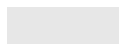

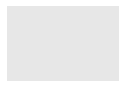

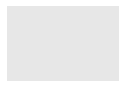

In [14]:
#collapse-hide

for key in shape_dict:
    s = key
    X_3_a = torch.ones(shape_dict[s])
    info(X_3_a, "'X three (a)'"[:-1] + " " + s + "'" )
    viz_tens( 25 * X_3_a )

#### ... 3. (b) zeros of given shape

tensor     'X three (a) i' 

    num. dims        1
    num. entries     3
    shape            [3]


┌─────┬─────┬─────┐
│ 0.0 │ 0.0 │ 0.0 │
└─────┴─────┴─────┘



tensor     'X three (a) ii' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌─────┬─────┬─────┐
│ 0.0 │ 0.0 │ 0.0 │
├─────┼─────┼─────┤
│ 0.0 │ 0.0 │ 0.0 │
└─────┴─────┴─────┘



tensor     'X three (a) iii' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌─────┬─────┬─────┐
│ 0.0 │ 0.0 │ 0.0 │
├─────┼─────┼─────┤
│ 0.0 │ 0.0 │ 0.0 │
└─────┴─────┴─────┘





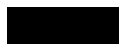

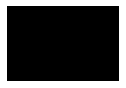

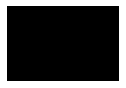

In [15]:
#collapse-hide

for key in shape_dict:
    s = key
    X_3_b = torch.zeros(shape_dict[s])
    info(X_3_b, "'X three (a)'"[:-1] + " " + s + "'" )
    viz_tens( 25 * X_3_b )

#### ... 3. (c) i.i.d. uniform of given shape

tensor     X 3 (c)  i 

    num. dims        1
    num. entries     3
    shape            [3]


┌──────┬──────┬──────┐
│ 0.88 │ 0.91 │ 0.38 │
└──────┴──────┴──────┘



tensor     X 3 (c)  ii 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌──────┬──────┬──────┐
│ 0.95 │ 0.39 │ 0.60 │
├──────┼──────┼──────┤
│ 0.25 │ 0.79 │ 0.94 │
└──────┴──────┴──────┘



tensor     X 3 (c)  iii 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌──────┬──────┬──────┐
│ 0.13 │ 0.93 │ 0.59 │
├──────┼──────┼──────┤
│ 0.86 │ 0.56 │ 0.74 │
└──────┴──────┴──────┘





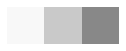

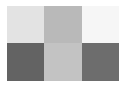

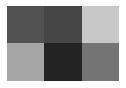

In [16]:
#collapse-hide

for key in shape_dict:
    s = key
    X_3_c = torch.rand(shape_dict[s])
    info(X_3_c, "X 3 (c) " + " " + s )
    viz_tens( 25 * X_3_c )


#### ... 3. (d) i.i.d. standard normal of given shape

tensor     X 3 (d) i 

    num. dims        1
    num. entries     3
    shape            [3]


┌──────┬──────┬──────┐
│ -1.2 │ 0.52 │ 1.22 │
└──────┴──────┴──────┘



tensor     X 3 (d) ii 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌──────┬──────┬──────┐
│ 0.15 │ -0.3 │ -0.4 │
├──────┼──────┼──────┤
│ -0.2 │ -0.1 │ -1.1 │
└──────┴──────┴──────┘



tensor     X 3 (d) iii 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌──────┬──────┬──────┐
│ -0.8 │ -0.7 │ 0.12 │
├──────┼──────┼──────┤
│ -0.1 │ -2.2 │ -0.6 │
└──────┴──────┴──────┘





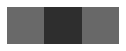

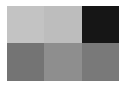

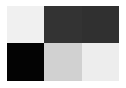

In [17]:
#collapse-hide

for key in shape_dict:
    s = key
    X_3_d = torch.randn(shape_dict[s])
    info(X_3_d, "X 3 (d)" + " " + s )
    viz_tens( 25 * X_3_d )

#### ... 3. (f) sequence

In [55]:
#collapse-hide

X_3_f = torch.arange(10,20) 
info(X_3_f, "X 3 (f)")
viz_tens( 25 * X_3_f ) # note the modular arith. being performed automatically

tensor     X 3 (f) 

    num. dims        1
    num. entries     10
    shape            [10]


┌────┬────┬────┬────┬────┬────┬────┬────┬────┬────┐
│ 10 │ 11 │ 12 │ 13 │ 14 │ 15 │ 16 │ 17 │ 18 │ 19 │
└────┴────┴────┴────┴────┴────┴────┴────┴────┴────┘





### <font color="teal">numpy objects and tensors</font>

Tensors can be converted to numpy arrays, and numpy arrays back to tensors.
To transform a numpy array into a tensor, we can use the function `torch.from_numpy`, and we use `np.array` for the other direction.

The conversion of tensors to numpy require the tensor to be on the CPU, and not the GPU.

In case you have a tensor on GPU, you need to call `.cpu()` on the tensor beforehand.
Hence, you get a line like `np_arr = tensor.cpu().numpy()`.

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and changing one will change the other. 

In [19]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [20]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


### <font color="teal">... tensor operations</font>

Most operations existing in numpy also exist in PyTorch. A full list of operations can be found in the [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#).

* Each torch operation can be run on the GPU.

* By default, tensors are created on the CPU. Unless we are using a package like `pytorch-lightning`, we need to explicitly move tensors to the GPU using the `.to` method, after checking GPU availability. 

* Copying large tensors across devices can be expensive in terms of time and memory.


#### ... adding tensors

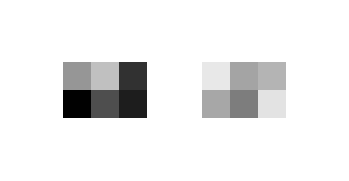

In [21]:
#collapse-hide

X_1, X_2 = torch.rand(2,3), torch.rand(2,3)
viz_tens_list( [ X_1, X_2 ] )

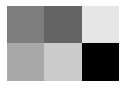

In [22]:
#collapse-hide

Y = X_1 + X_2
viz_tens(Y) 

#### ... stacking tensors

In [23]:
#collapse-hide

X_1, X_2 = torch.arange(5,10), torch.arange(10,15)

info(X_1, "X 1")

info(X_2, "X 2")

tensor     X 1 

    num. dims        1
    num. entries     5
    shape            [5]


┌───┬───┬───┬───┬───┐
│ 5 │ 6 │ 7 │ 8 │ 9 │
└───┴───┴───┴───┴───┘



tensor     X 2 

    num. dims        1
    num. entries     5
    shape            [5]


┌────┬────┬────┬────┬────┐
│ 10 │ 11 │ 12 │ 13 │ 14 │
└────┴────┴────┴────┴────┘





In [24]:
#collapse-hide

Y = torch.stack([X_1, X_2], dim = 0)
info(Y, "Y")

tensor     Y 

    num. dims        2
    num. entries     10
    shape            [2 5]


┌────┬────┬────┬────┬────┐
│ 5  │ 6  │ 7  │ 8  │ 9  │
├────┼────┼────┼────┼────┤
│ 10 │ 11 │ 12 │ 13 │ 14 │
└────┴────┴────┴────┴────┘





#### ... in-place operations

Operations that store the result into the operand are called _in-place_. They are  usually marked with a underscore postfix, e.g. "`add_`" instead of "`add`". The operation `X.copy_(Y)` will change `X`.

Calling `x1 + x2` creates a new tensor containing the sum of the two inputs.
However, we can also use in-place operations that are applied directly on the memory of a tensor.
We therefore change the values of `x2` without the chance to re-accessing the values of `x2` before the operation.
An example is shown below:

In [25]:
#collapse-hide

X_1, X_2 = torch.rand(2, 3), torch.rand(2, 3)
print("\t","before", "\n")
info(X_1, "'X one'")
info(X_2, "'X two'")

print("\n\n")

X_2.add_(X_1)
print("\t","after","\n")
info(X_1, "'X one'")
info(X_2, "'X two'")

	 before 

tensor     'X one' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌──────┬──────┬──────┐
│ 0.14 │ 0.53 │ 0.15 │
├──────┼──────┼──────┤
│ 0.65 │ 0.32 │ 0.65 │
└──────┴──────┴──────┘



tensor     'X two' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌──────┬──────┬──────┐
│ 0.39 │ 0.91 │ 0.20 │
├──────┼──────┼──────┤
│ 0.20 │ 0.20 │ 0.94 │
└──────┴──────┴──────┘






	 after 

tensor     'X one' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌──────┬──────┬──────┐
│ 0.14 │ 0.53 │ 0.15 │
├──────┼──────┼──────┤
│ 0.65 │ 0.32 │ 0.65 │
└──────┴──────┴──────┘



tensor     'X two' 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌──────┬──────┬──────┐
│ 0.54 │ 1.44 │ 0.36 │
├──────┼──────┼──────┤
│ 0.85 │ 0.52 │ 1.60 │
└──────┴──────┴──────┘





> In-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss of history. Hence, their use is discouraged. 

#### ... reshaping tensors

Another common operation aims at changing the shape of a tensor.
A tensor of size `(2,3)` can be re-organized to any other shape with the same number of elements (e.g. a tensor of size `(6)`, or `(3,2)`, ...).

In PyTorch, this reshaping operation is called `view`:

In [26]:
#collapse-hide

X = torch.arange(6)
info(X,"X")

tensor     X 

    num. dims        1
    num. entries     6
    shape            [6]


┌───┬───┬───┬───┬───┬───┐
│ 0 │ 1 │ 2 │ 3 │ 4 │ 5 │
└───┴───┴───┴───┴───┴───┘





In [27]:
#collapse-hide

X = X.view(2, 3)
info(X,"X")

tensor     X 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌───┬───┬───┐
│ 0 │ 1 │ 2 │
├───┼───┼───┤
│ 3 │ 4 │ 5 │
└───┴───┴───┘





#### ... transposing tensors (permuting dimensions)

In [28]:
#collapse-hide

X = X.permute(1,0)
info(X,"X with 0th and 1st dimensions permuted")

tensor     X with 0th and 1st dimensions permuted 

    num. dims        2
    num. entries     6
    shape            [3 2]


┌───┬───┐
│ 0 │ 3 │
├───┼───┤
│ 1 │ 4 │
├───┼───┤
│ 2 │ 5 │
└───┴───┘





In [29]:
#collapse-hide

X = X.T
info(X, "X transposed again")

tensor     X transposed again 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌───┬───┬───┐
│ 0 │ 1 │ 2 │
├───┼───┼───┤
│ 3 │ 4 │ 5 │
└───┴───┴───┘





#### ... numpy-like indexing and slicing

In [30]:
#collapse-hide

X = torch.rand( 4,4 )
info( X, "X" )
info( X[0], "first row of X" )
info( X[:,0], "first column of X" )
info( X[...,-1], "last column of X" )
info( X[:2, -1], "First two rows, last column")
info( X[1:3, :], "Middle two rows" )

tensor     X 

    num. dims        2
    num. entries     16
    shape            [4 4]


┌──────┬──────┬──────┬──────┐
│ 0.66 │ 0.98 │ 0.08 │ 0.00 │
├──────┼──────┼──────┼──────┤
│ 0.10 │ 0.16 │ 0.70 │ 0.67 │
├──────┼──────┼──────┼──────┤
│ 0.91 │ 0.24 │ 0.15 │ 0.76 │
├──────┼──────┼──────┼──────┤
│ 0.29 │ 0.80 │ 0.38 │ 0.78 │
└──────┴──────┴──────┴──────┘



tensor     first row of X 

    num. dims        1
    num. entries     4
    shape            [4]


┌──────┬──────┬──────┬──────┐
│ 0.66 │ 0.98 │ 0.08 │ 0.00 │
└──────┴──────┴──────┴──────┘



tensor     first column of X 

    num. dims        1
    num. entries     4
    shape            [4]


┌──────┬──────┬──────┬──────┐
│ 0.66 │ 0.10 │ 0.91 │ 0.29 │
└──────┴──────┴──────┴──────┘



tensor     last column of X 

    num. dims        1
    num. entries     4
    shape            [4]


┌──────┬──────┬──────┬──────┐
│ 0.00 │ 0.67 │ 0.76 │ 0.78 │
└──────┴──────┴──────┴──────┘



tensor     First two rows, last column 

    num.

In [31]:
#collapse-hide

X[:,1] = 0
info(X, "modified X")

tensor     modified X 

    num. dims        2
    num. entries     16
    shape            [4 4]


┌──────┬─────┬──────┬──────┐
│ 0.66 │ 0.0 │ 0.08 │ 0.00 │
├──────┼─────┼──────┼──────┤
│ 0.10 │ 0.0 │ 0.70 │ 0.67 │
├──────┼─────┼──────┼──────┤
│ 0.91 │ 0.0 │ 0.15 │ 0.76 │
├──────┼─────┼──────┼──────┤
│ 0.29 │ 0.0 │ 0.38 │ 0.78 │
└──────┴─────┴──────┴──────┘





#### ... other operations

Here are some ways to perform matrix multiplication:

* `torch.matmul` $\quad$ Performs the matrix product over two tensors, where the specific behavior depends on the dimensions.
If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product.
For higher dimensional inputs, the function supports broadcasting (for details see the [documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)).

    It can also be written as `a @ b`, similar to numpy.

* `torch.mm` $\quad$ Performs the matrix product over two matrices, but doesn't support broadcasting (see [documentation](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm))

* `torch.bmm` $\quad$ Performs the matrix product with a support batch dimension. Let `T` be a tensor of shape `(b,  n, m)`, and `R` a tensor of shape `(b, m, p)`, the output tensor is of shape `(b, n , p)`, obtained by "entry-wise" matrix multiplication along the batch dimension. 

* `torch.einsum` $\quad$ Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention.

Usually, we use `torch.matmul` or `torch.bmm`. 

In [32]:
#collapse-hide

X, Y = torch.arange(6).view(2, 3), torch.arange(9).view(3, 3)

info(X,"X")

info(Y,"Y")


tensor     X 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌───┬───┬───┐
│ 0 │ 1 │ 2 │
├───┼───┼───┤
│ 3 │ 4 │ 5 │
└───┴───┴───┘



tensor     Y 

    num. dims        2
    num. entries     9
    shape            [3 3]


┌───┬───┬───┐
│ 0 │ 1 │ 2 │
├───┼───┼───┤
│ 3 │ 4 │ 5 │
├───┼───┼───┤
│ 6 │ 7 │ 8 │
└───┴───┴───┘





In [33]:
#collapse-hide

Z = torch.matmul(X,Y)
info(Z, "Z")

tensor     Z 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌────┬────┬────┐
│ 15 │ 18 │ 21 │
├────┼────┼────┤
│ 42 │ 54 │ 66 │
└────┴────┴────┘





Given a tensor `X`, the tensors `Y_1`,`Y_2`, `Y_3` computed below all have the same value:

    Y_1 = X @ X.T
    Y_2 = X.matmul(X.T)
    Y_3 = torch.rand_like(X)
    torch.matmul(X, X.T, out = Y_3)

On the other hand, `*` denotes the entrywise product of two tensors. 

In [34]:
#collapse-hide

X = torch.arange(6).view(2, 3)
info(X,"X")

tensor     X 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌───┬───┬───┐
│ 0 │ 1 │ 2 │
├───┼───┼───┤
│ 3 │ 4 │ 5 │
└───┴───┴───┘





In [35]:
#collapse-hide

info( X * X, "(a)")
info( X.mul(X), "(b)")

tensor     (a) 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌───┬────┬────┐
│ 0 │ 1  │ 4  │
├───┼────┼────┤
│ 9 │ 16 │ 25 │
└───┴────┴────┘



tensor     (b) 

    num. dims        2
    num. entries     6
    shape            [2 3]


┌───┬────┬────┐
│ 0 │ 1  │ 4  │
├───┼────┼────┤
│ 9 │ 16 │ 25 │
└───┴────┴────┘





You can use `torch.cat` to concatenate a sequence of tensors along a given dimension. See also `torch.stack`, another tensor joining op that is subtly different from `torch.cat`

In [36]:
#collapse-hide

Y = torch.cat( [X, X, X], dim =1)
info(Y, "Y")

tensor     Y 

    num. dims        2
    num. entries     18
    shape            [2 9]


┌───┬───┬───┬───┬───┬───┬───┬───┬───┐
│ 0 │ 1 │ 2 │ 0 │ 1 │ 2 │ 0 │ 1 │ 2 │
├───┼───┼───┼───┼───┼───┼───┼───┼───┤
│ 3 │ 4 │ 5 │ 3 │ 4 │ 5 │ 3 │ 4 │ 5 │
└───┴───┴───┴───┴───┴───┴───┴───┴───┘





If you have a one-element tensor, for example obtained by aggregating all values of a given tensor into a single value, you can convert it to a Python numerical value using `item()`:

In [37]:
#collapse-hide

agg = X.sum()
agg_item = agg.item() 
print(agg_item, "\t", type(agg_item))

15 	 <class 'int'>


## <font color="CornflowerBlue">2.2 ... one-dimensional convolutions of scalar-valued signals</font>

We now consider one of the simplest possible settings for learning, in which the underlying domain is a one-dimensional grid, and where signals over the domain have only a single channel. 

In this case, the signal domain is a group itself, the cyclic group of order $n$, 
$$
C_n = \langle \, a : a^n = 1 \, \rangle \equiv \{ \, 1, a, a^2, \dots, a^{n-1} \, \}.
$$
It is convenient to parametrize the group, and hence the grid, through the exponent of the generator 
$$
C_n \equiv \{ 0, 1, \dots, n -1 \}
$$
as this indexing is consistent with the way most python indexes vectors. In this setting, the group operation may be reinterpreted as addition modulo $n$.

As the input domain is fixed, it feels natural to consider the GDL group $G$ to be $C_n$ as well. 

We suppose that signals are scalar-valued, and are encoded in the natural basis, so that each $x \in \mathcal{X}(C_n, \mathbb{R})$ may be expressed as 

$$
\mathcal{X}(C_n,\mathbb{R}) = \{ x : C_n \to \mathbb{R} \} ,
$$
is finite dimensional, and each $x \in \mathcal{X}(C_n, \mathbb{R})$ may be expressed as 
$$
x = 
\left[ 
\begin{matrix}
x_0\\ 
\vdots\\
\,x_{n-1}\,
\end{matrix}
\right] 
$$

With this basis, we can describe the representation $\rho$ of $G \equiv C_n$ concretely, as a matrix. 

Given a vector $\theta = (\theta_0 , \dots, \theta_{n-1})$, recall the associated <font color="purple">_circulant matrix_</font> is the $n \times n$ matrix with entries 
$$
S(\theta) := \left( \, \theta_{ (u - v) \mod n} \right)_{ 0 \, \leq \,u,\,v \, \leq n-1 } 
$$

In the specific case of $\theta_{+} := (0,1,0,\dots, 0)^T$, the associated circulant matrix, $S_{+} := S(\theta_{+})$ acts on vectors by shifting the entries of vectors to the right by one position, corresponding to addition by one, modulo $n$. 

We call $S_+$ the _<font color="purple">(right) shift operator</font>_. 

___
__Lemma__ $\quad$
A matrix is circulant if and only if it commutes with $S_+$. Moreover, given any two vectors $\theta, \eta \in \mathbb{R}^n$, one has $S(\theta) S(\eta) = S(\eta) S(\theta)$. 
___

The importance of $S_+$ to the present discussion is that it generates a group isomorphic to the one-dimensional translation group $C_n$; the matrices $\{ I, S_+, S_+^2, \dots, S_+^{n-1} \}$ constitute a faithful representation of $C_n$. 

Circulant matrices are synonymous with discrete convolutions; given $x, \theta \in \mathcal{X}(\Omega,\mathbb{R}) \equiv \mathbb{R}^n$, their _convolution_ $x \star \theta$ is defined by 
$$
( x \star \theta )_u := \sum_{v = 0}^{n-1} x_{v \mod n}\, \theta_{ (u-v) \mod n} \equiv S(\theta) x 
$$

Thus, the next corollary effectively follows from the much stronger theorem stated at the end of [section 1.3](https://the-ninth-wave.github.io/geometric-deep-learning/jupyter/2021/10/21/GDL1.html#1.3-...-equivariance-in-neural-networks). 

___

__Corollary__ $\quad$ Any $f : \mathcal{X}(C_n, \mathbb{R}) \to \mathcal{X}(C_n,\mathbb{R})$ which is linear and $C_n$-equivariant can be expressed (in the input coordinate system) as an $n \times n$ circulant matrix $S(\theta)$ for some vector $\theta$.

___


___
___

### <font color="teal">...example: local averaging as a circulant matrix</font>



$\quad$ Recall a [previous recipe](https://the-ninth-wave.github.io/geometric-deep-learning/jupyter/2021/10/21/GDL1.html#...-example:-permutations-and-local-averaging) for an equivariant function $F= \Phi( X, A)$ using a local aggregation function $\varphi$. 

In our present case of $\Omega \equiv G \equiv C_n$, we may write this local aggregation more concretely as
$$
\varphi ( x_u, X_{\textsf{nbhd}(u)} ) = \varphi( x_{u-1}, \, x_u, \, x_{u+1} ),
$$
with addition and subtraction in the indices above understood to be modulo $n$. 

 If in addition, we insist that $\varphi$ is linear, then it has the form 
$$
 \varphi( x_{u-1}, \, x_u, \, x_{u+1} ) = \theta_{-1} x_{u-1} + \theta_0 x_u + \theta_1 x_{u+1},
$$
and in this case we can express $F = \Phi (X, A )$ through the following matrix multiplication:
$$
\left[
\begin{matrix}
\theta_0 & \theta_1 & \text{ } & \text{ } & \theta_{-1} \\
\theta_{-1} & \theta_0 & \theta_1 & \text{ } &   \text{ } \\
\text{} & \ddots & \ddots & \ddots & \text{ } \\
\text{ } & \text{ } & \theta_{-1} & \theta_0 & \theta_1 \\
\theta_1 & \text{ } & \text{ } & \theta_{-1} & \theta_0 
\end{matrix} 
\right]
\left[
\begin{matrix}
x_0 \\
x_1 \\
\vdots \\
\,x_{n-2} \, \\
x_{n-1}  
\end{matrix}
\right]
$$
This multi-diagonal structure is often synonymous with the concept of weight sharing in ML literature. 

___
___

## <font color="CornflowerBlue">2.3 ... one-dimensional convolutions in torch</font>

The object in `torch` for executing convolutions of signals over $C_n$ is called `torch.nn.Conv1d`. We'll denote an instance of this object by $\tilde{B}$ 

___

#### class ... `torch.nn.Conv1d`

|      args        |           |            |   |   |
|--------------|-----------|------------|-----|----|
| `in_channels` | `out_channels`      | `kernel_size` | `stride = 1` |
|  `padding = 0`     | `dilation = 1`  | `groups = 1`      | `bias = True` |
| `padding_mode = 'zeros'` | `device = None` | `dtype = None` | 


Let us now relate the shapes of the input and output to the parameters


| input parameter      | LaTeX symbol |
| ----------- | ----------- |
| `in_channels`      | $\text{dim}(\mathcal{C})$     |
| `out_channels`   | $\text{dim}(\tilde{\mathcal{C}})$        |
| `kernel_size`      | $k$       |
| `stride`   | $\lambda$        |
| `padding`   | $\rho$        |
| `dilation`      | $\delta$       |
| `groups`   | $M$        



This class specifies a [one-dimensional convolution operation](https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html).  Because of batching and the channel dimension, the input and output are $3$-tensors. We use $N$ to denote the batch size, and we will continue to use $n$ for the input length.

In general, $\mathcal{C}$ and $\mathcal{C}_1$ are the vector spaces of input channels and output channels respectively. In our current setting, assuming that signals $x$ are scalar signals over the cyclic group, one has $\textrm{dim}(\mathcal{C}) = 1$. The shape of the input tensor is thus

$$
(N, 1, n)
$$

Even though we restrict ourselves to scalar-valued input signals, we will allow $\textrm{dim}(\tilde{\mathcal{C}}) > 1$, and we will write $\tilde{n}$ to denote the length of the output, so that the shape of the output tensor is

$$
(N, \textrm{dim}(\tilde{\mathcal{C}}), \tilde{n})
$$

For the moment, we will also take $N=1$. Thus, inputs can be though of effectively as vectors, which we can easily visualize. We will think of the output as a length-$\textrm{dim}(\tilde{\mathcal{C}})$ list of vectors (with scalar entries).

Our present goal is to try to understand how the number of learnable parameters depends on these shapes, as well as to visualize the effect of a convolutional layer in this simplest setting. 

First, we remark that the relationship between $n_1$ and $n$, in terms of the input parameters, can be expressed as follows:

$$
\tilde{n} = \left\lfloor \frac{ n + 2 \rho - \delta (k-1) -1 }{\lambda} + 1 \right\rfloor
$$

___

### method ... `compute_out_size` 

In [47]:
#collapse-hide

def compute_out_size(in_size,
                     padding,
                     dilation,
                     kernel_size,
                     stride):
    numerator = in_size + 2 * padding - dilation * ( kernel_size - 1) - 1

    arg_of_floor = (numerator / stride) + 1

    return np.floor( arg_of_floor )

___

___
___

### <font color="teal">... example: concrete layer

For now, we will instantiate a parameters dictionary with `dilation = 1` and `padding = 0`. Let us use $n = 32$, so that 

$$
\tilde{n} = \left\lfloor \frac{n-k}{\lambda} + 1 \right\rfloor \equiv \left\lfloor \frac{32-k}{\lambda} + 1 \right\rfloor
$$

For our example, we specialize to `kernel_size = 4` and `stride = 2`, in which case $\tilde{n} = 15$. 


In [52]:
odcp = {} # one dimensional conv. parameters

odcp["in_size"] = 32
odcp["in_channels"] = 1
odcp["padding"] = 0
odcp["dilation"] = 1
odcp["kernel_size"] = 4
odcp["stride"] = 2
odcp["groups"] = 1
odcp["out_channels"] = 16

In [53]:
#collapse-hide

odcp["out_size"] = compute_out_size(
    in_size = odcp["in_size"],
    padding = odcp["padding"],
    dilation = odcp["dilation"],
    kernel_size = odcp["kernel_size"],
    stride = odcp["stride"]
    )

print( odcp["out_size"] )

15.0


One of the important free parameters we can choose to initialize a one-dimensional convolutional layer is the number of `out_channels`. We choose `out_channels = 16` in our first example. 

In many vision related CNNs, the first layer takes in a grayscale or RGB image, outputting features with a _much_ larger number of channels. 

> I am thinking of each output channel as a separate "lint roller" to run over the image. 

From the [docs](https://pytorch.org/docs/stable/generated/torch.nn.Conv1d.html), the parameter `groups` "controls the connections between inputs and outputs."

Both `in_channels` and `out_channels` must be divisible by `groups`: 

* At `groups = 1`, all inputs are convolved to all outputs.

* At `groups = 2`, the operation becomes equivalent to having two convolutional layers side by side, each seeing half the input channels and producing half the output channels, and both subsequently concatenated.

* At `groups = in_channels`, each input channel is convolved with its own set of filters (of size `out_channels` / `in_channels`). 

By taking `in_channels = 1`, we must have `groups = 1` also. 

The learned parameters of layer $\tilde{B}$ are of two types: those in the weight tensor $\tilde{\theta}$, and those in the bias vector $\tilde{b}$. At this point, for simplicity, we set $\tilde{b} \equiv 0$ via `bias = False`, so that the only learned parameters are those in $\tilde{\theta}$. 

In [56]:
from torch.nn import Conv1d

We now initialize the convolutional layer. 

In [85]:
B_tilde = Conv1d(in_channels = odcp["in_channels"],
                 out_channels = odcp["out_channels"],
                 kernel_size = odcp["kernel_size"],
                 stride = odcp["stride"],
                 padding = odcp["padding"],
                 dilation = odcp["dilation"],
                 groups = odcp["groups"],
                 bias = False
                )

Let us initialize a few possible input signals: `X_1`, `X_2`, `X_3`.

In [102]:
#collapse-hide

X_1 = torch.arange(0,32)
info(X_1, "X 1")
viz_tens( X_1, display_size = 10 )

X_2 = torch.rand( (32) ) 
info(X_2, "X 2")
viz_tens( X_2, display_size = 10 )

X_3 = torch.randn( (32) )
info(X_3, "X 3")
viz_tens( X_3, display_size = 10 )

tensor     X 1 

    num. dims        1
    num. entries     32
    shape            [32]


┌───┬───┬───┬───┬───┬───┬───┬───┬───┬───┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┬────┐
│ 0 │ 1 │ 2 │ 3 │ 4 │ 5 │ 6 │ 7 │ 8 │ 9 │ 10 │ 11 │ 12 │ 13 │ 14 │ 15 │ 16 │ 17 │ 18 │ 19 │ 20 │ 21 │ 22 │ 23 │ 24 │ 25 │ 26 │ 27 │ 28 │ 29 │ 30 │ 31 │
└───┴───┴───┴───┴───┴───┴───┴───┴───┴───┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┴────┘



tensor     X 2 

    num. dims        1
    num. entries     32
    shape            [32]


┌──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┬──────┐
│ 0.25 │ 0.69 │ 0.89 │ 0.36 │ 0.29 │ 0.04 │ 0.24 │ 0.06 │ 0.38 │ 0.60 │ 0.03 │ 0.93 │ 0.81 │ 0.01 │ 0.26 │ 0.66 │ 0.39 │ 0.44 │ 0.2

To apply `B_tilde` to these signals, we must augment each signal with batch and channel dimensions:

In [103]:
#collapse-hide

X_1 = torch.as_tensor( X_1[ None, None, : ], dtype= torch.float32 )
X_2 = torch.as_tensor( X_2[ None, None, : ], dtype= torch.float32 )
X_3 = torch.as_tensor( X_3[ None, None, : ], dtype= torch.float32 )

Each output has shape

In [106]:
#collapse-hide

Y_1 = B_tilde( X_1 ).detach()
Y_2 = B_tilde( X_2 ).detach()
Y_3 = B_tilde( X_3 ).detach()

print( np.array( Y_1.size() ) )

[ 1 16 15]


This is the output shape which we predicted: the last entry `15` is the length $\tilde{n}$ of the output vector at each channel. The output has `16` channels, and our batch size $N$ remains `1`. 

The easiest way to visualize this output is to use `torch.squeeze`, which removes all dimensions of the input tensor of size one. The shape of each `Y_1`, `Y_2`, `Y_3` after this squeezing will be `[16,15]`.

In [107]:
#collapse-hide

Y_1 = torch.squeeze(Y_1)
Y_2 = torch.squeeze(Y_2)
Y_3 = torch.squeeze(Y_3)

print( np.array( Y_1.size() ) )

[16 15]


visualizing `X_1`:

In [123]:
# collapse-hide

viz_tens(torch.squeeze(X_1), display_size = 10)

visualizing `Y_1`

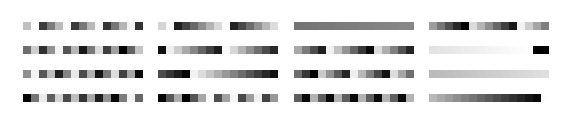

In [128]:
# collapse-hide

Y_1_list = [ Y_1[j,:] for j in range(16) ]

list_Y_1 = [ tens[None,:] for tens in Y_1_list ]

viz_tens_list(list_Y_1, display_size = 10)

`X_2`

In [129]:
# collapse-hide

viz_tens(torch.squeeze(X_2), display_size = 10)

`Y_2`

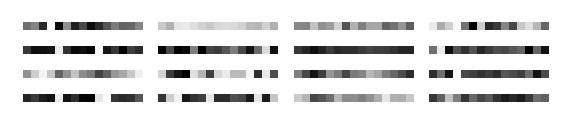

In [130]:
# collapse-hide

Y_2_list = [ Y_2[j,:] for j in range(16) ]

list_Y_2 = [ tens[None,:] for tens in Y_2_list ]

viz_tens_list(list_Y_2, display_size = 10)

`X_3`

In [131]:
# collapse-hide

viz_tens(torch.squeeze(X_3), display_size = 10)

`Y_3`

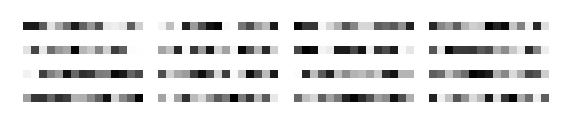

In [132]:
# collapse-hide

Y_3_list = [ Y_3[j,:] for j in range(16) ]

list_Y_3 = [ tens[None,:] for tens in Y_3_list ]

viz_tens_list(list_Y_3, display_size = 10)

___
___

It is also of interest to say something about the size and shape of the weight tensor $\tilde{\theta}$ that effectively constitutes the layer `B_tilde` $\equiv \tilde{B}$, having set the bias of this layer to be zero. 

In [152]:
#collapse-hide

four_tuple_list = [ B_tilde.weight[j][0].detach() for j in range(16) ]
four_tuple_list_prime = [ B_tilde.weight[j].detach() for j in range(16) ]
weight_stack = torch.stack(four_tuple_list)

We can view this weight matrix as a grid of "images," each of which is effectively a $4$-tuple. 

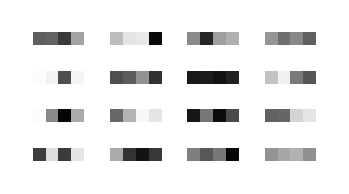

In [154]:
# collapse-hide

viz_tens_list( four_tuple_list_prime )

as a single block, 

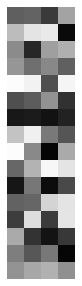

In [149]:
#collapse-hide

viz_tens(weight_stack, display_size = 5)

___

__Rmk__ $\quad$ The next thing to link up with is the description of generalized convolution from the first notebook. Recall that, in general, one has

$$
\tilde{\theta} \in \mathcal{X} ( H \backslash G / \tilde{H}, \mathcal{C} \otimes \tilde{\mathcal{C}} ),
$$

but let us reduce this further based on the assumptions made. Because $G \equiv \Omega \equiv C_n$, subgroup $H$ must be the trivial subgroup $\{ e \}$. Moreover, having assumed that $\dim{\mathcal{C}} = 1$, one also has $\mathcal{C} \otimes \tilde{\mathcal{C}} \cong \tilde{\mathcal{C}}$, so we may write

$$
\tilde{\theta} \in \mathcal{X} ( G / \tilde{H} ) , \tilde{\mathcal{C}} ),
$$

with $C_{\tilde{n}} \cong G / \tilde{H}$. Of course, as $15$ does not divide $32$, we cannot interpret this as true directly in the case above; no doubt this is resolved through some zero-padding, but something to explore a little. 
___

## <font color="CornflowerBlue">2.4 ... two-dimensional convolutions in torch</font>

____

#### `torch.nn.Conv2d`


The arguments:

* `in_channels`

* `out_channels`

* `kernel_size`

* `stride` $\quad$ controls the stride for the cross-correlation, a single number or a tuple. 

* `padding` $\quad$ controls amount of padding applied to the input. It can either be a string, `"valid"` or `"same"` or a tuple of ints giving the amount of implicit padding applied on both sides. 

* `dilation` $\quad$ controls the spacing between kernel points; "also known as the a trous algorithm

* `groups` $\quad$ controls connections between inputs and outputs. The `in_channels` and `out_channels` must be divisible by `groups`. For example,

    * At groups = 1, all inputs are convolved to all outputs

    * At groups = 2, the operation becomes equivalent to having two conv layers side by side, each seeing half the input channels, and producing half the output channels, and both subsequently concatenated. 

    * At groups = `in_channels`, each input channel is convolved with its own set of filters (of size `out_channels // in_channels`)

* `bias`

* `padding_mode`,

* `device`,

* `dtype`

Let us now relate the shapes of the input and output to the parameters


| input parameter      | LaTeX symbol |
| ----------- | ----------- |
| `in_channels`      | $\text{dim}(\mathcal{C})$     |
| `out_channels`   | $\text{dim}(\mathcal{C}_1)$        |
| `kernel_size`      | $k$       |
| `stride`   | $\lambda$        |
| `padding`   | $\rho$        |
| `dilation`      | $\delta$       |
| `groups`   | $M$        



Additionally, we use $N$ for the batch size of the input, `N`. We also let $(h,w)$ denote the height-width pair describing the shape of the input signal domain. 

Correspondingly, we write $(h_1, w_1)$ for the height-width pair describing the shape of the output signal domain. 

We remark that the stride can be either integer or a $2$-tuple, whose coordinates describe the vertical and horizontal stride respectively. We still write $\lambda$ for the stride when it is a tuple, and use $\lambda_h \equiv \lambda[0]$ and $\lambda_w \equiv \lambda[1]$ to denote its first and second coordinate, in this case. Likewise, the padding and kernel size may be $2$-tuples as well, and we use similar notation to denote their entries.  

The full shape of the input to the layer includes the batch dimension, and is thus

$$
(N, \text{dim}(\mathcal{C}), H, W) \,,
$$

while the shape of the output is

$$
(N , \text{dim}(\mathcal{C}_1), H_1, W_1 )
$$

These shapes, in particular the spatial dimensions of each, are related as follows: 

$\begin{align}
H_1 &= \left\lfloor \frac{
    H + 2 \rho_h - \delta_h ( k_h -1) -1 }{\lambda_h}
\right\rfloor \\
W_1 &= \left\lfloor \frac{
    W + 2 \rho_w - \delta_w ( k_w -1) -1 }{\lambda_w}
\right\rfloor
\end{align}$,

in particular, the batch size does not have any bearing on how the shapes of tensors transform. 

The parameters to be learned are the weights $w^1$ and biases $b^1$. These are both `Tensor` objects, accessed from the layer as `Conv2d.weight` and `Conv2d.bias`. The shape of the weight tensor is

$$
\textrm{shape}(w^1) =
\left( \, \text{dim}(\mathcal{C}_1),  \, \text{dim}(\mathcal{C}) \big/ M , k_h, k_w \right)
$$

The tensor $w^1$ thus has 

$$
\textrm{size}(w^1) = \textrm{dim}(\mathcal{C}_1) \textrm{dim} (\mathcal{C}) k_h k_w \big/ M
$$

scalar entries. 

There is always the question of how to initialize weights. In the case of the `Conv2d` class, the weights are initialized to be i.i.d. $\text{Unif}( - \sqrt{ \alpha_1}, \sqrt{\alpha_1} )$ random variables, where

$$
\alpha_1 := \frac{ \textrm{dim}(\mathcal{C}_1) }{\textrm{size}(w^1)}
$$



The bias tensor is a much smaller object, we have 

$
\begin{align}
\textrm{shape}(b^1) = (\, \textrm{dim}(\mathcal{C}_1  ) \,) \, , \quad \textrm{size}(b^1) = \textrm{dim}(\mathcal{C}_1)
\end{align}
$

Despite this, we use the same initialization (with mutual independence of all random variables in discussion) for the bias entries as we did for the weights. 

## ... A simple CNN

We consider possibly the simplest neural network that we can construct through the above blueprint. Suppose we have a binary classification problem, with the following hypothesis space. Let $\textsf{H}_1$ denote the hypothesis space of functions $f : \mathcal{X}( C_n, \mathbb{R}) \to \{0,1\}$ of the form 

$$
f = A \circ P \circ \mathbf{a} \circ B \,,
$$
where the components of $f$ are 

where the components of $f$ are 


* $B$  : $\quad$ A $C_n$-equivariant function, to be learned. It is represented as a circulant matrix $\mathbf{C}(\theta)$, where $\theta$ is a vector $\theta \equiv (\theta_0, \dots, \theta_{n-1})$ whose entries $\theta_j$ are parameters to be learned. 

* $ \mathbf{a} $ : $\quad$ We consider the ReLU activation function, $a : \mathbb{R} \to \mathbb{R}_{\geq\, 0}$ defined by $a(w) = \max(0,w)$, for $w \in \mathbb{R}$. The bold-face $\mathbf{a}$ denotes the entry-wise action of this function on a given vector;for $y \equiv (\,y_1, \,\dots, \, y_n \, ) \in \mathcal{X}(C_n, \mathbb{R})$, which we imagine as the output of $B(x)$ for some input signal $x$, we have $\mathbf{a} (y ) = ( \,  \max(0,y_1), \,  \dots, \, \max(0,y_n) )$. There are no learned parameters in this layer. 

* $P$ : $\quad$ A coarsening operator. In this case, let us say it is a _zero-padded group homomorphism_. 

 $P : C_n \to C_{n / d }$ for some divisor $d \mid n$ \footnote{zero-padding} , and let us say that it operates through max-pooling on the signal, over the pre-images of each element of $C_{n / d}$. 

* $A$ : $\quad$ A global-pooling layer. We assume this has the form of a fully-connected layer, followed by a softmax. Specifically,